In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import numpy as np

In [10]:
def landmarks(X, m):
    n = X.shape[0]
    indx = np.random.choice(n, m, replace=False)
    Z = X[indx]
    return Z


def nystroem(X, samples=10, r=2, d=2):
    Z = landmarks(X, samples)
    C = (X.dot(Z.T)) ** d
    W = (Z.dot(Z.T)) ** d
    V, A, _ = np.linalg.svd(W)
    V = V[:, :r]
    S_inv = np.sqrt(1 / A[:r])
    L = C.dot(V) * S_inv
    K = L.dot(L.T)
    V, A, _ = np.linalg.svd(L.T.dot(L))
    A_inv = 1 / A
    X_out = L.dot(V) * np.sqrt(A_inv)
    return K, X_out

def frobenius(K_origin, K):
    return np.linalg.norm(K_origin - K, 'fro') / np.linalg.norm(K_origin, 'fro')

In [11]:
X, y = make_circles(n_samples=1000, factor=.3, noise=.05)
reds = y == 0
blues = y == 1

basis = 10
rank = 2

K_origin = (X.dot(X.T)) ** 2

K1, X1 = nystroem(X, samples=20, r=rank, d=2)


print("K: " + str(np.linalg.norm(K_origin, 'fro')))
print("K1: " + str(np.linalg.norm(K1, 'fro')))

print("K - K1: " + str(frobenius(K_origin, K1)))

K: 314.041948531673
K1: 258.1203206012132
K - K1: 0.5118796665327674


Text(0,0.5,'$x_2$')

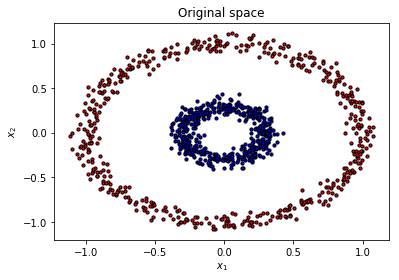

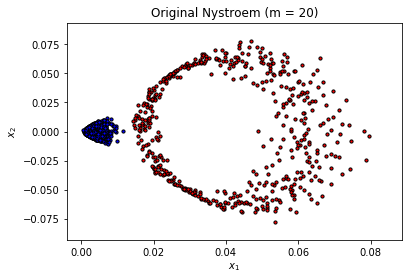

In [12]:
X_origin = X
#X_origin[:, 1] = np.abs(X_origin[:, 1])

plt.figure(1)
plt.title("Original space")
plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=10, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=10, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.figure(2)
plt.title("Original Nystroem (m = 20)")
plt.scatter(X1[reds, 0], X1[reds, 1], c="red",
            s=10, edgecolor='k')
plt.scatter(X1[blues, 0], X1[blues, 1], c="blue",
            s=10, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Text(0,0.5,'$x_2$')

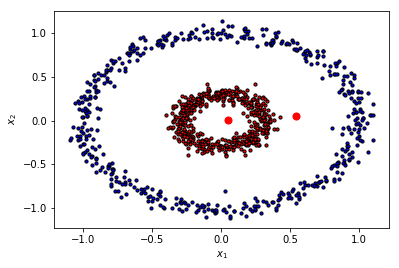

In [8]:
kmeans = KMeans(n_clusters = 2, random_state = 42)                   
kmeans.fit_predict(K1)
k_reds = kmeans.labels_ == 0
k_blues = kmeans.labels_ == 1
plt.scatter(X[k_reds, 0], X[k_reds, 1], c="red", s=10, edgecolor='k')
plt.scatter(X[k_blues, 0], X[k_blues, 1], c="blue", s=10, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'red')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")